<class 'PIL.PngImagePlugin.PngImageFile'>


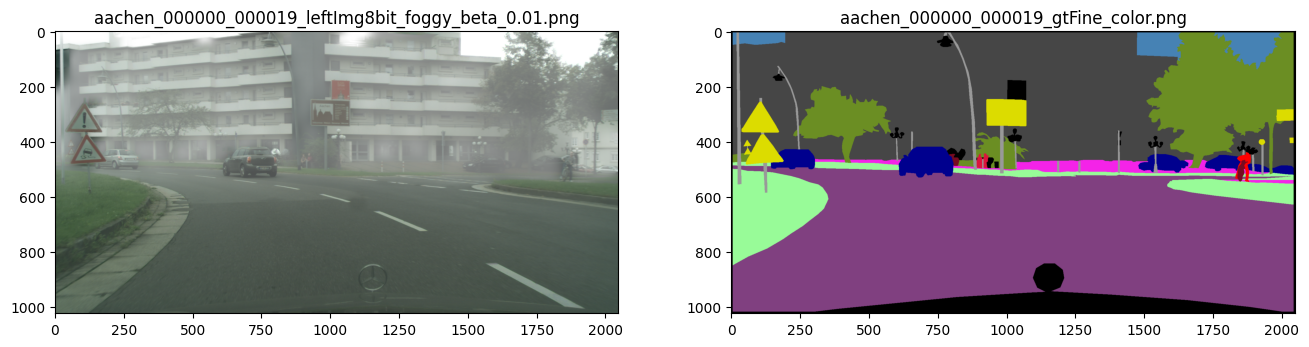

<class 'PIL.PngImagePlugin.PngImageFile'>


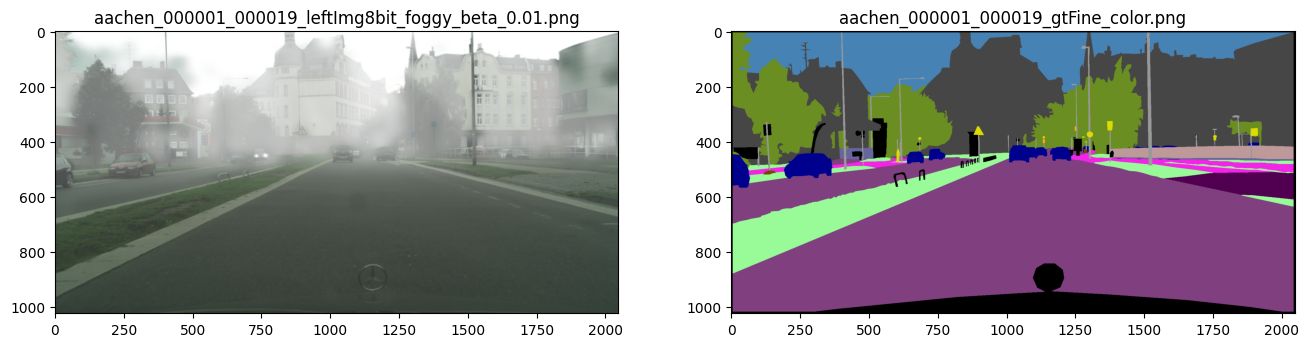

In [76]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
import cityscapesscripts
import os
from PIL import Image

class YourCustomDataset(Dataset):
    def __init__(self, root_path, input, target, input_beta = 0.01, train_transform=None):
        """
        Args:
            root_path (str): path to data
            input (str): specific path to input data 
            target (str): specific path to target (annotation) data
            input_beta (float): defines the synthetic fog density to filter the images to
            train_transform (bool, optional): Applies the defined data transformations used in training. Defaults to None.
        """
        super(YourCustomDataset, self).__init__()
        self.root_path = root_path
        self.input = input
        self.target = target
        self.input_beta = input_beta
        self.train_transform = train_transform

        # iterates through training data and creates an array of image names filtered to specified fog beta
        self.image_names = []
        X_TRAIN_PATH = os.path.join(self.root_path, self.input)
        for CITY_NAME in os.listdir(X_TRAIN_PATH):
            CITY_PATH = os.path.join(X_TRAIN_PATH, CITY_NAME)
            for image_name in os.listdir(CITY_PATH):
                if str(self.input_beta) in image_name:
                    IMAGE_PATH = os.path.join(CITY_PATH, image_name)
                    self.image_names.append(IMAGE_PATH)

        # same for annotation_names, filters to color annotation_names
        self.annotation_names = []
        Y_TRAIN_PATH = os.path.join(self.root_path, self.target)
        for CITY_NAME in os.listdir(Y_TRAIN_PATH):
            CITY_PATH = os.path.join(Y_TRAIN_PATH, CITY_NAME)
            for annotation_name in os.listdir(CITY_PATH):
                if "color" in annotation_name:
                    ANNOTATION_PATH = os.path.join(CITY_PATH, annotation_name)
                    self.annotation_names.append(ANNOTATION_PATH)

    def __len__(self):
        """
        Necessary function returning the length of the dataset
        https://pytorch.org/tutorials/beginner/basics/data_tutorial.html
        
        Returns:
            _type_: _description_
        """

        number_files_input = len(self.image_names)
        number_files_target = len(self.annotation_names)

        if number_files_input == number_files_target:
            return number_files_input
        else:
            return f"Input: {number_files_input} does not match Target: {number_files_target}"
        
    def __getitem__(self, idx):
        """
        Necessary function that loads and returns a sample from the dataset at a given index. 
        https://pytorch.org/tutorials/beginner/basics/data_tutorial.html
        
        Based on the index,it identifies the input and target images location on the disk, 
        reads both items as a numpy array (float32). If the train_transform argument is True, 
        the above defined train transformations are applied. Else, the test transformations are applied
        Args:
            idx (iterable): 
        Returns:
            tensors: input and target image
        """
        # print(idx)

        input_path = self.image_names[idx]
        target_path = self.annotation_names[idx]

        input_img = Image.open(input_path)
        target_img = Image.open(target_path)

        sample = {'input_img': input_img, 'input_name': input_path.split("\\")[-1], 'target_img': target_img, 'target_name': target_path.split("\\")[-1]}

        return sample    

ROOT_PATH = r"C:\Users\Jayden Hsiao\Documents\Grad School\02 - Fall 2024\SYDE 577\semantic-foggy-driving\data"
INPUT_PATH = r"leftImg8bit_trainvaltest_foggy\leftImg8bit_foggy\train"
TARGET_PATH = r"gtFine_trainvaltest\gtFine\train"

dataset = YourCustomDataset(root_path=ROOT_PATH, input=INPUT_PATH, target=TARGET_PATH)


for i, sample in enumerate(dataset):
    if i > 1:
        break

    plt.figure(figsize=(16,8))
    plt.subplot(121)
    plt.title(sample['input_name'])
    plt.imshow(sample['input_img'])
    plt.subplot(122)
    plt.title(sample['target_name'])
    plt.imshow(sample['target_img'])
    plt.show()

In [ ]:
# train_x = []
# train_y = []

# for CITY_NAME in os.listdir(X_TRAIN_PATH):
#     CITY_PATH = os.path.join(X_TRAIN_PATH, CITY_NAME)
#     for image_name in os.listdir(CITY_PATH):
#         if 
#         IMAGE_PATH = os.path.join(CITY_PATH, image_name)
#         image = cv2.imread(IMAGE_PATH)
#         train_x.append(image)

# plt.imshow(train_x[0])
# plt.show()